### total 12,447개

미국 - 1042개(뉴스)  
미국 - 1094개(블로그)  

여행 - 991개(뉴스)  
여행 - 1098개(블로그)  

네이버 - 815개(뉴스)  
네이버 - 1944개(블로그)  

네이버블로그 - 453개(뉴스)  
네이버블로그 - 975개(블로그)  

네이버쇼핑 - 300개(뉴스)  
네이버쇼핑 - 1000개(블로그)  

네이버지도 - 508개(뉴스)  
네이버지도 - 924개(블로그)  

네이버클라우드 - 376개(뉴스)  
네이버클라우드 - 927개(블로그)  

***import***

In [1]:
import pandas as pd
import pykospacing
spacer = pykospacing.Spacing()
from konlpy.tag import Okt
okt = Okt()
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

**데이터 불러오기**

In [2]:
NAVER_news = pd.read_csv('네이버(뉴스)-815row.csv')
NAVER_blog = pd.read_csv('네이버(블로그)-1944row.csv')

In [3]:
NAVER_news

,title,link,description
0,"와이랩, 신작 '잔반없는 날' 네이버웹툰서 연재",https://n.news.naver.com/mnews/article/001/001...,\n\n\n\n\n\n와이랩 새 웹툰 '잔반없는 날'[와이랩 제공] (서울=연...
1,"미래에셋증권, 네이버클라우드와 빅데이터 페스티벌 개최",https://n.news.naver.com/mnews/article/421/000...,\n\n\n\n\n\n(미래에셋증권 제공)(서울=뉴스1) 공준호 기자 = 미래에셋증...
2,"미래에셋증권·네이버클라우드, 협력 확대",https://n.news.naver.com/mnews/article/014/000...,\n\n'빅데이터 페스티벌' 공동 개최 \n\n\n\n사진=미래에셋증권 [파이낸셜...
3,매서운 구글 추격에 네이버 전면 새 단장 나선다 [이명지의 IT뷰어],https://n.news.naver.com/mnews/article/050/000...,\n\n[이명지의 IT뷰어]\n\n\n\n네이버의 멀티미디어 검색 강화 예시.(사진...
4,"네이버, 맞춤형 AI로 차별화…美 데이터 통제 꺼리는 해외 공략",https://n.news.naver.com/mnews/article/003/001...,\n\n일본·중동 등 해외 정부 맞춤형 AI 시스템 제공범용 AI 모델 MS·구글과...
...,...,...,...
810,경기동부 우수 소상공인 기획전 ‘장인의 앞뜰리에’ 20일간 네이버와 롯데온에서 진행,https://n.news.naver.com/mnews/article/081/000...,"\n\n여주 전통주, 이천 도자기, 양평 막걸리, 가평 브루어리 식사권 · 레저이용..."
811,"서울디지털재단-네이버클라우드, 업무협약…인공지능 및 빅데이터 분야 민·관 협력",https://n.news.naver.com/mnews/article/030/000...,\n\n\n\n\n\n서울디지털재단-네이버클라우드 협약식 기념사진. 사진 왼쪽 두번...
812,"경기동부 우수 소상공인 기획전 ""장인의 앞뜰리에"" 20일간 네이버와 롯데온에서 진행",https://n.news.naver.com/mnews/article/277/000...,"\n\n여주 전통주, 이천 도자기, 양평 막걸리, 가평 브루어리 식사권·레저이용권,..."
813,"네이버·카카오 ""공공 데이터 개방 확대해야 글로벌 AI 경쟁력 확보""",https://n.news.naver.com/mnews/article/031/000...,\n\n31일 초거대 AI 시대의 대한민국 그리고 AI 주권 토론회 개최네이버-카카...


**본문 합치기**

In [4]:
df_news = NAVER_news['description'].astype(str).str.cat(sep=' ')

In [5]:
df_blog = NAVER_blog['description'].astype(str).str.cat(sep=' ')

In [6]:
df_news

'\n\n\n\n\n\n와이랩 새 웹툰 \'잔반없는 날\'[와이랩 제공]    (서울=연합뉴스) 김경윤 기자 = 콘텐츠 제작사 와이랩이 30일 새 오리지널 웹툰 \'잔반없는 날\'을 네이버웹툰과 네이버시리즈에서 연재한다고 밝혔다.    \'잔반없는 날\'은 천계 최고의 요리사인 주인공이 지상으로 추방당해 고등학교 영양사가 되면서 벌어지는 이야기를 담았다.    와이랩이 운영하는 웹툰 학원인 와이랩 아카데미 출신 AHN 작가의 작품으로, \'절대검감\', \'나 혼자 네크로맨서\'의 프로듀싱을 한 한동우·이수현 작가가 각각 글과 그림 프로듀싱을 맡았다.    AHN 작가는 "동양 판타지 요소와 학교라는 공간에서 펼쳐지는 다양한 사건사고, 이를 해결하는 주인공과 등장인물들이 주는 재미가 큰 작품"이라고 소개했다.    와이랩은 세계관을 공유하는 웹툰을 제작하는 콘텐츠제공사(CP사)로, \'아일랜드\', \'스터디그룹\', \'테러맨\' 등의 여러 웹툰 IP를 보유하고 있다.     heeva@yna.co.kr\n\n \n\n\n\n\n\n(미래에셋증권 제공)(서울=뉴스1) 공준호 기자 = 미래에셋증권이 네이버클라우드와 공동으로 빅데이터 페스티벌을 진행한다고 30일 밝혔다. 빅데이터 페스티벌은 2017년 시작 이래 7회째 이어지고 있는 국내 최대 규모의 금융 공모전이다.이번 공모전은 \'생성형의 시대, AI와 빅데이터로 내가 만드는 금융서비스\'라는 슬로건을 바탕으로 △초거대 언어 모델(LLM)을 활용한 대 고객 금융서비스 제안 △고객 및 시장 데이터를 활용한 대 고객 금융서비스 제안 등 두 가지 주제 중 한 가지를 선택하여 참가가 가능하다. 총 6000만원(1등 2000만원) 규모의 상금과 미래에셋증권 인턴십 및 채용 연계 혜택이 제공될 예정이다.참가 접수는 지난 22일부터 6월29일까지 약 5주간 받으며 최대 3인 1개팀으로 참가 신청을 할 수 있다. 이후 예선을 거쳐 상위 18개팀이 본선에 진출하게 되며 본선 후 6개팀은 최종 결선 발표의 기회를 얻게 된다. 

### 전처리 함수 
*6주차 01.WordCloud 실습코드 참고*

- <span style = 'font-size:1.1em;line-height:1.5em'>(1) 줄바꿈 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(2) 오탈자 교정 (생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(3) 띄어쓰기 교정</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(4) sentence tokenization (너무 오래걸려서 생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(5) 특수문자 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(6) word tokenization (형태소 분석 및 stemming)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(7) stopword removal</span>

**불용어 목록 생성**

In [7]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거

In [8]:
def preprocessing(x):
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    results = []
    result = []
    x = x.replace('\n',' ') # (1) 줄바꿈 문자 제거
    df_news = spacer(x) # (3) 띄어쓰기 교정
    
    tokens = okt.morphs(x, stem=True) # (6) word tokenization
    for token in tokens:
        token = p.sub('', token) # (5) 특수문자 제거
        if token not in stopwords:
            result.append(token) # (7) stopword removal
    results.extend(result)
    results = ' '.join(results)
    return results

### pos_taging 함수

#(1) 품사 태깅 수행 

#(2) 명사, 형용사, 부사에 해당하는 단어들만 추출하여 저장

#(3) 빈도가 가장 높은 단어는 주로 주제로 검색한 단어이기에 의미있는 결과를 위해 제거

In [9]:
def pos_taging(x):
    pos_news = okt.pos(x) # (1)
    filtered_result = [word for word, pos in pos_news if pos in ['Noun', 'Adjective', 'Adverb']] # (2)
    nouns_news = [n for n in filtered_result if len(n) > 1]
    count = Counter(nouns_news) # 각 단어의 출현 빈도를 계산
    tags = count.most_common(100) # 가장 빈도가 높은 단어 100개 추출
    tags = tags[1:] # (3)
    return tags

**전처리 및 postag 진행**

In [10]:
news = preprocessing(df_news)
news = pos_taging(news)

In [11]:
blog = preprocessing(df_blog)
blog = pos_taging(blog)
blog = [word for word in blog if not word[0].endswith('다')]

## Wordcloud 생성

In [12]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\text\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

***news***

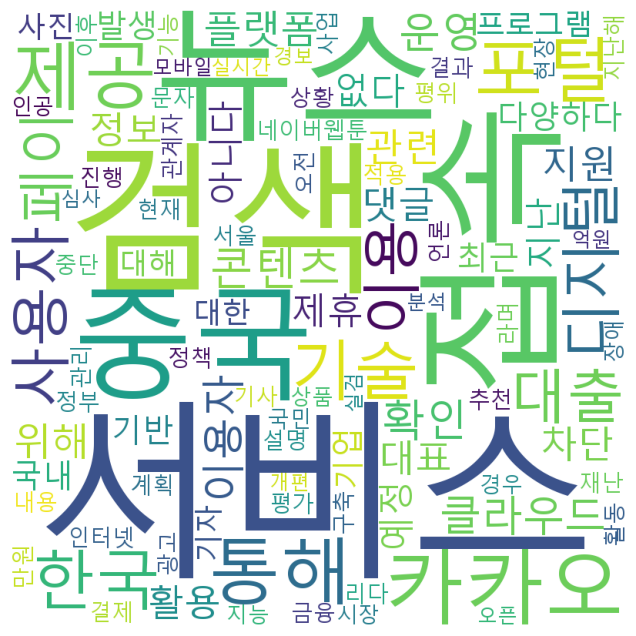

In [29]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(news))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud)

***blog***

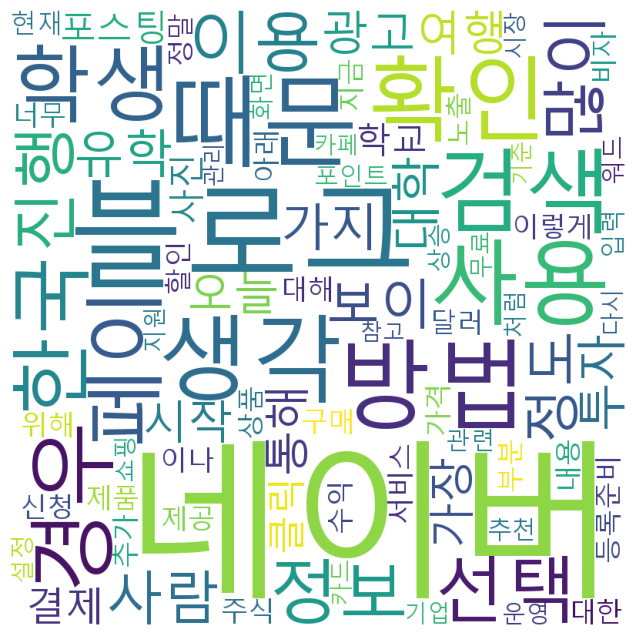

In [30]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(blog))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud)